<a href="https://colab.research.google.com/github/SatyabrataBhattacharjee/PharmaRAG--A-Retrieval-Augmented-Generation-RAG-powered-medical-assistant-for-drug-related-queries./blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gurgaon_properties_missing_value_imputation (3).csv')

In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   float64
 6   bathroom         3554 non-null   float64
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   float64
 12  servant room     3554 non-null   float64
 13  store room       3554 non-null   float64
 14  pooja room       3554 non-null   float64
 15  others           3554 non-null   float64
 16  furnishing_type  3554 non-null   float64
 17  luxury_score  

In [ ]:
df.describe()

,price,price_per_sqft,bedRoom,bathroom,floorNum,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
count,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000,3554.000000
mean,2.441533,11271.406584,3.092572,3.267586,6.887451,1861.515790,0.187676,0.358751,0.090321,0.172482,0.107485,0.391671,72.461171
std,2.783788,7084.234404,1.245600,1.450033,6.062694,1216.429665,0.390508,0.479701,0.286681,0.377852,0.309772,0.586170,53.090901
min,0.070000,544.000000,1.000000,1.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.950000,6744.750000,2.000000,2.000000,2.000000,1202.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,1.510000,8888.500000,3.000000,3.000000,5.000000,1614.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,2.650000,13268.500000,4.000000,4.000000,10.000000,2200.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,111.000000
max,31.500000,49500.000000,10.000000,12.000000,51.000000,12222.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,174.000000


In [ ]:
temp=df.drop(columns=['society','price_per_sqft'])

<Axes: ylabel='luxury_score'>

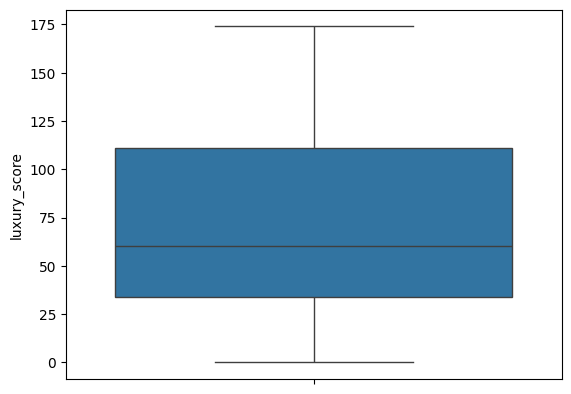

In [ ]:
sns.boxplot(df['luxury_score'])

In [ ]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [ ]:
temp['luxury_category']=temp['luxury_score'].apply(categorize_luxury)

In [ ]:
temp.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


<Axes: ylabel='floorNum'>

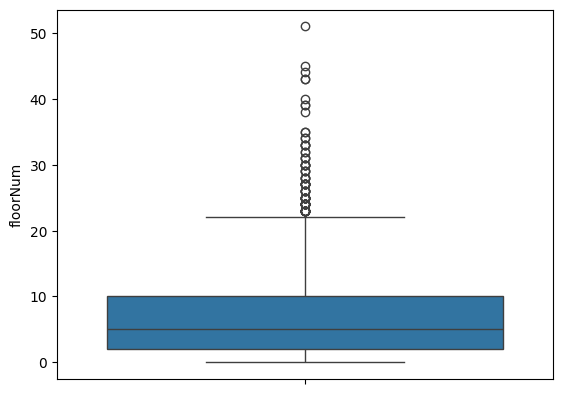

In [ ]:
sns.boxplot(temp['floorNum'])

In [ ]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [ ]:
temp['floor_category'] = temp['floorNum'].apply(categorize_floor)


In [ ]:
temp.head()


,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = temp.copy()

categorical_cols = temp.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,4.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,17.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,10.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,5.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,5.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,2.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,160.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,5.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,76.0,2.0,2.0


### Technique 1 - Correlation Analysis

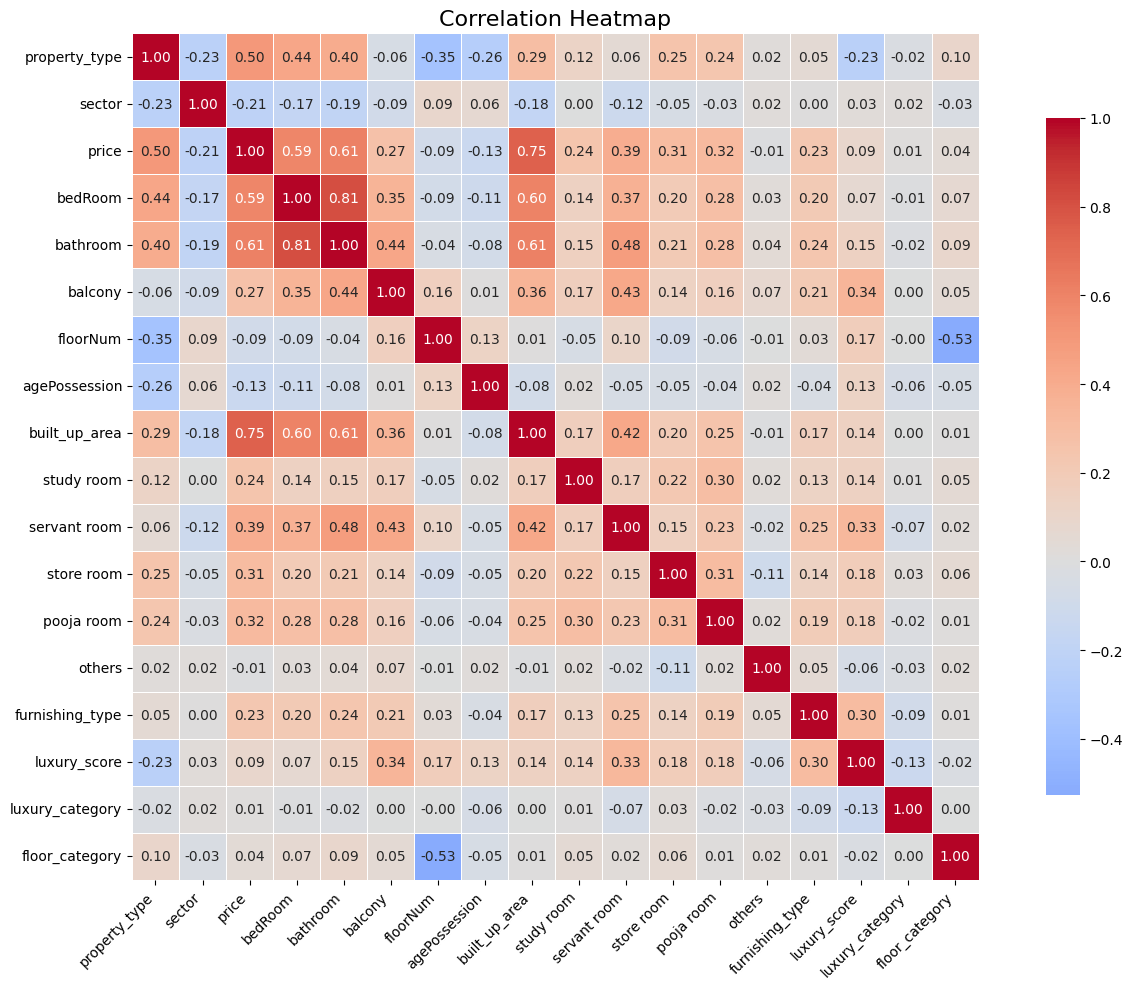

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))  # Bigger figure for clarity

# Generate the correlation matrix
corr_matrix = data_label_encoded.corr()

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,               # Show correlation coefficients
    fmt=".2f",                # Format the numbers to 2 decimal places
    cmap='coolwarm',          # Color map: blue → white → red
    center=0,                 # Center the colormap at 0
    square=True,              # Keep squares equal for symmetry
    linewidths=0.5,           # Thin lines between squares
    cbar_kws={"shrink": 0.8}  # Shrink color bar size
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)               # Keep y labels horizontal
plt.tight_layout()
plt.show()


In [ ]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1.sort_values(by='corr_coeff', ascending=False)

,feature,corr_coeff
1,price,1.000000
7,built_up_area,0.748574
3,bathroom,0.609777
2,bedRoom,0.591289
9,servant room,0.391930
11,pooja room,0.319852
10,store room,0.305677
4,balcony,0.269637
8,study room,0.242955
13,furnishing_type,0.225625


### 2 - Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.642585
0,property_type,0.098888
1,sector,0.091857
14,luxury_score,0.030110
3,bathroom,0.023248
2,bedRoom,0.020793
5,floorNum,0.017760
9,servant room,0.016622
6,agePossession,0.012006
4,balcony,0.010116


## 3.Gradient Boosting Feature importances

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.681548
1,sector,0.098128
0,property_type,0.094976
2,bedRoom,0.036970
3,bathroom,0.035188
9,servant room,0.019315
10,store room,0.008114
14,luxury_score,0.008044
5,floorNum,0.007211
6,agePossession,0.004393


### 4 - Permutation Importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.743942
0,property_type,0.196767
1,sector,0.167072
2,bedRoom,0.024898
14,luxury_score,0.023238
3,bathroom,0.020524
9,servant room,0.014224
5,floorNum,0.011739
6,agePossession,0.005605
4,balcony,0.001498


### 5 - LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
7,built_up_area,1.508337
0,property_type,0.724342
3,bathroom,0.273855
10,store room,0.200596
8,study room,0.173045
13,furnishing_type,0.163675
9,servant room,0.158688
11,pooja room,0.073823
15,luxury_category,0.055427
5,floorNum,0.031086


### 6 - RFE

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.637963
0,property_type,0.104679
1,sector,0.092070
14,luxury_score,0.032681
3,bathroom,0.021832
2,bedRoom,0.021603
9,servant room,0.018162
5,floorNum,0.016432
6,agePossession,0.010692
4,balcony,0.009506


### 7 - Linear Regression Weights

In [ ]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,built_up_area,1.511095
0,property_type,0.732980
3,bathroom,0.276914
10,store room,0.203230
8,study room,0.180868
13,furnishing_type,0.170202
9,servant room,0.164185
11,pooja room,0.076779
15,luxury_category,0.067926
5,floorNum,0.056843


8 - SHAP

In [ ]:
!pip install shap



In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-1.85575536e-01,  1.24365092e-01, -3.39239645e-02, ...,
        -2.44066274e-02,  1.36666690e-03,  2.21129500e-05],
       [-1.98714692e-01, -3.96702687e-01, -4.34778639e-02, ...,
         1.12118763e-02,  1.44851493e-04,  2.37319100e-03],
       [-1.78832472e-01, -4.30622816e-01, -4.21387869e-02, ...,
         1.29379203e-02, -4.16531927e-03, -9.11080874e-03],
       ...,
       [-1.88100920e-01,  8.02394429e-02, -1.28700492e-02, ...,
         2.84384664e-02,  1.00474449e-03,  3.93456122e-03],
       [ 1.46415846e+00,  8.74824706e-01,  2.98701351e-01, ...,
         1.56232221e-01,  3.28366205e-02,  5.70208630e-02],
       [-3.31784285e-01, -6.80387101e-03, -2.20646038e-02, ...,
         1.15220707e-03, -1.97693015e-02, -4.57637269e-03]])

In [ ]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
7,built_up_area,1.259272
0,property_type,0.476210
1,sector,0.358914
3,bathroom,0.110325
9,servant room,0.078697
14,luxury_score,0.056529
5,floorNum,0.052725
2,bedRoom,0.046769
4,balcony,0.031921
6,agePossession,0.024332


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [ ]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.212084,0.091857,0.098128,0.167072,-0.070667,0.092070,-0.080424,0.358914
bedRoom,0.591289,0.020793,0.036970,0.024898,0.015578,0.021603,0.020601,0.046769
bathroom,0.609777,0.023248,0.035188,0.020524,0.273855,0.021832,0.276914,0.110325
balcony,0.269637,0.010116,0.000994,0.001498,-0.046980,0.009506,-0.075874,0.031921
floorNum,-0.087442,0.017760,0.007211,0.011739,0.031086,0.016432,0.056843,0.052725
agePossession,-0.134171,0.012006,0.004393,0.005605,-0.000000,0.010692,-0.004443,0.024332
built_up_area,0.748574,0.642585,0.681548,0.743942,1.508337,0.637963,1.511095,1.259272
study room,0.242955,0.007530,0.002742,-0.006285,0.173045,0.008373,0.180868,0.018120
servant room,0.391930,0.016622,0.019315,0.014224,0.158688,0.018162,0.164185,0.078697


In [ ]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)


In [ ]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


,0
feature,
built_up_area,0.703617
sector,0.130042
bathroom,0.032397
bedRoom,0.027016
luxury_score,0.025765
servant room,0.022335
floorNum,0.016560
agePossession,0.009455
balcony,0.007925


In [ ]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,4.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,17.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,10.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,5.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,5.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,2.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,160.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,5.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,67.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,76.0,2.0,2.0


In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()


np.float64(0.8188943595648315)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

np.float64(0.8138528617325337)

In [ ]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
export_df.to_csv('FEATURE_SELECTED.csv', index=False)


In [ ]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_score,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,8.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,4.0,1.0,1226.0,1.0,0.0,0.0,38.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,17.0,1.0,1000.0,0.0,0.0,0.0,49.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,10.0,3.0,1615.0,1.0,0.0,1.0,174.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,5.0,3.0,582.0,0.0,1.0,0.0,159.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,5.0,3.0,532.0,0.0,0.0,0.0,73.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,2.0,3.0,6228.0,1.0,1.0,0.0,160.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,5.0,0.0,665.0,0.0,0.0,1.0,67.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,3.0,0.0,5490.0,1.0,1.0,0.0,76.0,2.0,2.0,15.50
